In [1]:
import random

faces = ["H", "T"]

# First Visualizations: Scatter Plots and Histograms

Before we try to answer the question about whether the coin is fair, we take a minute to consider how we can visualize the experimental results generated in the simulation. The most straight-forward plot to create from a sequence of numerical data is a *scatter plot*:
````{panels}
DEFINITION
^^^
scatter plot
: A (two-dimensional) scatter plot takes two sequences $\mathbf{x}= (x_0, x_1, \ldots)$ and $\mathbf{y}=(y_0, y_1, \ldots)$ and plots symbols (called *markers*) that represent the locations of the points $(x_0, y_0), (x_1, y_1), \ldots$ in two dimensions. 
````

 For our purposes, we will plot the observed data versus the experiment number.

Our first step in creating a scatter plot is to store all the data generated during the simulation. A list is a good container for this purpose:

In [2]:
num_sims = 100
flips = 20

results = []
for sim in range(num_sims):  # The simulation loop
    coins = random.choices(faces, k=flips)  # Simulate all coin flips for one experiment
    results += [
        coins.count("H")
    ]  # Add the number of 'H's in this experiment to our results list

There are many different libraries for generating plots in Python. The most common and popular is `matplotlib`, which is based on MATLAB's plotting commands. We usually import the `pyplot` module from `matplotlib` to the `plt` namespace:

In [3]:
import matplotlib.pyplot as plt

You may also want to use a Jupyter magic to make sure plots show up inline with your code and writing in your Jupyter notebook. We will typically use `%matplotlib inline`, but an alternative is `%matplotlib notebook`, which will make plots interactive.

In [4]:
%matplotlib inline

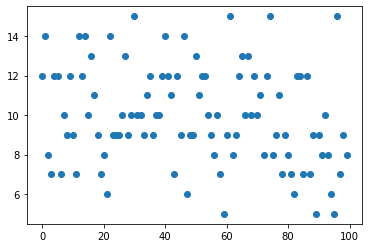

In [5]:
plt.scatter(range(num_sims), results)

It is helpful to label the axes and provide a title for future reference:

Text(0.5, 1.0, 'Experimental Numbers of Heads Observed when a Coin is Flipped 20 Times')

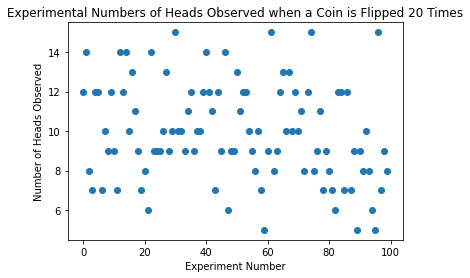

In [6]:
plt.scatter(range(num_sims), results)
plt.xlabel("Experiment Number")
plt.ylabel("Number of Heads Observed")
plt.title("Experimental Numbers of Heads Observed when a Coin is Flipped 20 Times")

It should be clear that most of the results are around 8-12.  It might be easier to visualize this if we plot the number of experiments in which value for the number of heads is observed. We can understand how to create this from a physical perspective: Imagine if we took the graph above and rotated it $90^\circ$ to the left and that the circular markers were turned into balls that were allowed to drop down until they fell onto the axis or another ball. Let's build exactly this type of visualization one ball at a time:

![BallDropHistogram](ball-histogram.gif "Counting Occurrences of Different Die Outcomes")


When the balls have finished dropping, the resulting plot shows the number of occurrences of each outcome. (See the code to generate this in the [Jupyter Notebook to Generate Ball Drop Graph](https://github.com/jmshea/Foundations-of-Data-Science-with-Python/blob/main/02/ball-drop-histogram.ipynb)).

For reference, a static version of the final figure is here:
![BallDropHistogramStatic](ball-histogram-static.png "Counting Occurrences of Different Die Outcomes")



This plot is a type of *histogram*: 

````{panels}
DEFINITION
^^^
histogram
: a type of bar graph in which the heights of the bars is proportional to the number of occurrences of the outcomes spanned by the width of the bars 
````

Histograms are often used for continuous data that may take on any real value within some range. The width of the bars correpond to `bins`, and outcomes anywhere within those bins are counted toward that bar. 

Matplotlib offers a `hist` function to create histograms, but it is designed for continuous data, and the bins Matplotlab's `hist` function chooses will often result in confusing visualizations for discrete data, where the data can only occur a specific points.

For instance, here is the data used to create the visualization above along with the histogram created using the default bins:

(array([ 1.,  1.,  1.,  3.,  8., 30., 17., 13., 14., 12.]),
 array([ 2. ,  3.2,  4.4,  5.6,  6.8,  8. ,  9.2, 10.4, 11.6, 12.8, 14. ]),
 <a list of 10 Patch objects>)

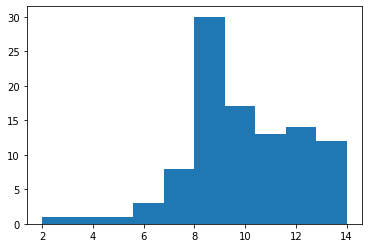

In [7]:
results = [
    11,
    11,
    8,
    10,
    10,
    12,
    10,
    7,
    12,
    10,
    11,
    11,
    7,
    11,
    10,
    8,
    10,
    13,
    6,
    9,
    11,
    12,
    11,
    14,
    5,
    11,
    10,
    9,
    8,
    9,
    11,
    9,
    6,
    8,
    9,
    9,
    6,
    7,
    12,
    9,
    13,
    12,
    9,
    8,
    8,
    10,
    8,
    14,
    10,
    10,
    9,
    7,
    10,
    13,
    10,
    13,
    8,
    13,
    7,
    12,
    9,
    9,
    12,
    7,
    11,
    9,
    14,
    12,
    8,
    2,
    12,
    12,
    9,
    12,
    9,
    13,
    12,
    9,
    13,
    11,
    10,
    7,
    13,
    10,
    9,
    11,
    13,
    10,
    12,
    12,
    7,
    8,
    11,
    10,
    10,
    4,
    9,
    8,
    9,
    8,
]
plt.hist(results)

We can see the counts and bin edges from the first two outputs of the `plt.hist()` function, respectively. The third output is a Matplotlib object that we will not cover in this book.

The histogram created by Matplotlib with the default bins looks distinctly different than the one we created. This is because the default is to create 10 bins that are evenly spaced between the minimum and maximum values. In this case, it results in bins that are 1.2 units wide, so some bins contain multiple different numbers of heads. For instance, there is a bin from 8 to 9.2 that includes both the values of 8 heads and 9 heads, resulting in the large spike in the middle. There is also a bin from 12.8 to 14, which includes both the values of 13 and 14 heads, resulting in the last bin on the right side being much taller than in the ball-drop histogram. 

In some cases, applying Matplotlib's `hist` function to discrete data will result in bins with the expected heights mixed with empty bins. For instance, we can specify `bins=15` to get 15 uniformly space bins, but again the result does not accurately reflect the distribution of the data, because now it has a large empty space in the middle:

(array([ 1.,  0.,  1.,  1.,  0.,  3.,  8., 12., 18.,  0., 17., 13., 14.,
         9.,  3.]),
 array([ 2. ,  2.8,  3.6,  4.4,  5.2,  6. ,  6.8,  7.6,  8.4,  9.2, 10. ,
        10.8, 11.6, 12.4, 13.2, 14. ]),
 <a list of 15 Patch objects>)

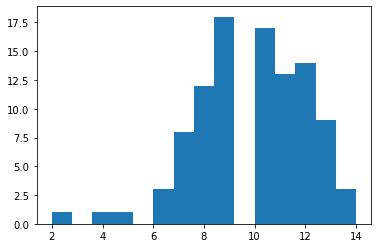

In [8]:
plt.hist(results, bins=15)


We can make a much better histogram by specifying the bins.  We will do so by specifying a list of bin edges. When working with integer data, it is typically best to make bins that are one unit wide with bin edges that are 0.5 to each side of the bin centers. To span the observed values in this dataset, we would need bin edges at $1.5, 2.5, \dots, 14.5$

We could make a list of these bin edges by typing them individually or by writing a `for` loop to add them to a list. However, let's take the opportunity to introduce the numpy function `np.linspace()` that can create a uniformly spaced array of points between (and including) two edges.  We need 15 points between 1.5 and 14.5, but a general approach to creating bin edges with `np.linspace()` as shown below. (The +2 in the number of bins is because 1) the number of points between two integers, inclusive of both, is one more than the difference of the integres, and 2) there is one more bin edge than there are bin centers.) 

In [9]:
import numpy as np

edges = np.linspace(
    min(results) - 0.5, max(results) + 0.5, max(results) - min(results) + 2
)
print(edges)

[ 1.5  2.5  3.5  4.5  5.5  6.5  7.5  8.5  9.5 10.5 11.5 12.5 13.5 14.5]


Take a look at the call signature of `np.linspace` and you see that it requires a `start` and a `stop`, but `num` (the number of points between the start and stop) takes a default value of 50 if it is not provided.

Now we are ready to regenerate the histogram with the correct bins:

(array([ 1.,  0.,  1.,  1.,  3.,  8., 12., 18., 17., 13., 14.,  9.,  3.]),
 array([ 1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5, 11.5,
        12.5, 13.5, 14.5]),
 <a list of 13 Patch objects>)

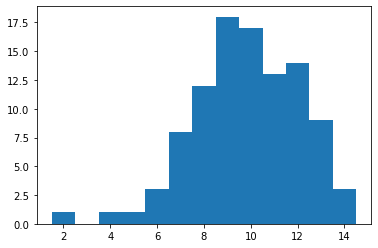

In [10]:
plt.hist(results, bins=edges)

This graph is not ideal for a variety of reasons. First, all the bars run together because they are the same color. Second, the $y$-axis labels are not appropriate because we have quantities that are integers, not real numbers. Third, it is a hard to read off the heights of the bars if they are far from the labeled $y$-axes. Finally, the axes are not labeled and the graph is not titled, so someone looking at the graph will have no idea what it is trying to convey. Fortunately, these are all easily remedied:
1. We can pass the `edgecolor` keyword parameter to the `plt.hist` function with value of `black`
1. We can specify the locations of the labeled "ticks" on the $y$-axis using `plt.yticks()`
1. We can add grid lines for the $y$-axis (at each tick) using `plt.grid()`
1. We can label our axes using `plt.xlabel()` and `plt.ylabel()`
1. We can add a title using `plt.title()`

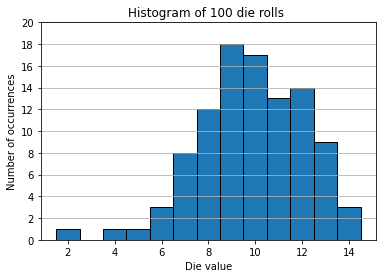

In [11]:
plt.hist(results, bins=edges, edgecolor="black")
plt.yticks(np.arange(0, 22, 2))
plt.grid(axis="y")
plt.xlabel("Die value")
plt.ylabel("Number of occurrences")
plt.title("Histogram of 100 die rolls ");

The **counts** of the outcomes can be used to estimate the **probabilities** of the outcomes if we turn them into relative frequencies:

````{panels}
DEFINITION
^^^
relative frequency
:  the proportion of times that we observe a result matching our criteria during repeated experiments (including simulation); i.e., the number of times that an event occurs divided by the number of times the experiment is conducted. 
````


For many experiments, the relative frequencies (results measured from experimentation) will converge to the true probabilities (mathematical descriptions fundamental to the experiments) when the number of experiments is large. (At this point in the book, we have any formal framework for calculating probabilities, but we will refine these statements in later chapters.

Let's consider two different approaches to getting the relative frequencies. The first is via `plt.hist`. **IF** the bin widths are equal to 1, then the relative frequencies can be found by setting the keyword parameter `density=True`. 

(array([0.01, 0.  , 0.01, 0.01, 0.03, 0.08, 0.12, 0.18, 0.17, 0.13, 0.14,
        0.09, 0.03]),
 array([ 1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5, 11.5,
        12.5, 13.5, 14.5]),
 <a list of 13 Patch objects>)

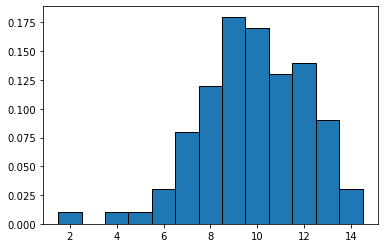

In [12]:
plt.hist(results, bins=edges, edgecolor="black", density=True)

Note that when `plt.hist()` is called with `density=True` and bins that are 1 unit wide, the first output will be the relative frequencies (the `density` parameter is useful in other situations when the bins are not 1 unit wide, but we defer the discussion of this to **CHAPTER ???**). We can verify the relative frequencies from `plt.hist` by directly counting and then normalizing. We could do this with a `for` loop, but NumPy makes this much easier using the `np.unique()` function, which will return a list of the unique values in a list or array. If `return_counts=True` is also passed to that function, it will also return an array that contains a count of each unique item:

In [13]:
vals, counts = np.unique(results, return_counts=True)
print(vals, counts)

[ 2  4  5  6  7  8  9 10 11 12 13 14] [ 1  1  1  3  8 12 18 17 13 14  9  3]


Then we can calculate the relative frequencies by dividing the counts by the
sum of the counts:

In [14]:
counts / counts.sum()

array([0.01, 0.01, 0.01, 0.03, 0.08, 0.12, 0.18, 0.17, 0.13, 0.14, 0.09,
       0.03])

The relative frequencies calculated using numpy are identical to those returned via `plt.hist()`. As we anticipated, the relative frequencies are highest around 10 heads and lowest for very few or very high numbers of heads. For instance, we see that the relative frequency of  6 heads is 0.03, which gives a good indication that this seeing 6  heads is rare. However, to determine whether it is rare enough for us to conclude that the coin must be biased requires some additional work:
$\!\;$

In [15]:

from jupytercards import display_flashcards

github='https://raw.githubusercontent.com/jmshea/Foundations-of-Data-Science-with-Python/main/02-first-stats/flashcards/'
display_flashcards(github+'first-vis.json')